In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import itertools
from shapely.geometry import Point

# Import Pt. 1

In [2]:
krsPath = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/02_vg250/vg250_neu/VG250_KRS.shp"
gemPath = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/02_vg250/vg250_neu/VG250_GEM.shp"

In [3]:
regiostarPath = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/06_EinleitungsAnalyse/regiostar-referenzdateien.xlsx"

In [4]:
dtypes = {'Stadtregion': str,
          'gem_19': str,
          'RegioStaR17': int}

In [5]:
df_krs = gpd.read_file(krsPath)
df_gem = gpd.read_file(gemPath)
df_rsta = pd.read_excel(regiostarPath, sheet_name = "ReferenzGebietsstand2019", usecols="A:R", dtype=dtypes)

### Daten einlesen

In [6]:
df_krs.head(3)

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,FK_S3,NUTS,ARS_0,AGS_0,WSK,DEBKG_ID,RS,SDV_RS,RS_0,geometry
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL20000002R,01001,010010000000,010010000000,"POLYGON ((3526591.850 6077123.907, 3526626.055..."
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL20000E43X,01002,010020000000,010020000000,"POLYGON ((3575940.276 6034122.503, 3575968.387..."
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL20000DYM9,01003,010030000000,010030000000,"POLYGON ((3623175.007 5985702.682, 3623310.494..."


In [7]:
df_krs.drop_duplicates(subset=['AGS'], inplace=True)

In [8]:
df_gem.head(3)

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,FK_S3,NUTS,ARS_0,AGS_0,WSK,DEBKG_ID,RS,SDV_RS,RS_0,geometry
0,6,4,1,010010000000,01001000,010010000000,Flensburg,Stadt,60,kreisfrei,...,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL20000E5MA,010010000000,010010000000,010010000000,"POLYGON ((3526591.850 6077123.907, 3526626.055..."
1,6,4,1,010020000000,01002000,010020000000,Kiel,Stadt,60,kreisfrei,...,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL20000004J,010020000000,010020000000,010020000000,"POLYGON ((3575940.276 6034122.503, 3575968.387..."
2,6,4,1,010030000000,01003000,010030000000,Lübeck,Stadt,60,kreisfrei,...,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL20000DYMA,010030000000,010030000000,010030000000,"POLYGON ((3623175.007 5985702.682, 3623310.494..."


In [9]:
df_gem.tail(3)

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,FK_S3,NUTS,ARS_0,AGS_0,WSK,DEBKG_ID,RS,SDV_RS,RS_0,geometry
11132,6,2,1,130755562135,13075135,130755562135,Ückeritz,Gemeinde,64,gemeinschaftsangehörig,...,R,DE80N,130755562135,13075135,2011-09-04,DEBKGDL20000XZEA,130755562135,130755562135,130755562135,"POLYGON ((3830644.189 5997215.307, 3830323.291..."
11133,6,2,1,130755562137,13075137,130755562137,Usedom,Stadt,63,gemeinschaftsangehörig,...,R,DE80N,130755562137,13075137,2011-09-04,DEBKGDL20000SRPG,130755562137,130755562137,130755562137,"POLYGON ((3824339.856 5982335.554, 3824131.758..."
11134,6,2,1,130755563094,13075094,130755563094,Murchin,Gemeinde,64,gemeinschaftsangehörig,...,R,DE80N,130755563094,13075094,2011-09-04,DEBKGDL20000004M,130755563094,130755563094,130755563094,"POLYGON ((3817020.383 5980632.777, 3817007.470..."


In [10]:
df_rsta.head(3)

,gem_19,gemrs_19,name_19,bev_19,fl_19,vbgem_19,vbgemrs_19rs,vbgnam_19,land_19,RegioStaR2,RegioStaR4,RegioStaR17,RegioStaR7,RegioStaR5,RegioStaRgem7,RegioStaRGem5,RegioStaR_Stadtregion,RegioStaR_NameStadtregion
0,1001000,10010000000,"Flensburg, Stadt",90164,53.02,1001000,10010000,"Flensburg, Stadt",1,2,22,221,75,54,74,53,NaN,NaN
1,1002000,10020000000,"Kiel, Landeshauptstadt",246794,118.65,1002000,10020000,"Kiel, Landeshauptstadt",1,1,12,121,72,52,72,52,1002000.0,Kiel
2,1003000,10030000000,"Lübeck, Hansestadt",216530,214.19,1003000,10030000,"Lübeck, Hansestadt",1,1,12,121,72,52,72,52,1003000.0,Lübeck


### Daten zwischenbearbeiten

In [11]:
df_rsta['gem_19'] = df_rsta['gem_19'].apply(lambda x: x.zfill(8))

### Check

In [12]:
df_gem.shape[0]

11135

### Daten verknüpfen

In [13]:
df = pd.merge(df_gem, df_rsta, left_on="AGS", right_on="gem_19", how="outer")

In [14]:
df.head(3)

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,land_19,RegioStaR2,RegioStaR4,RegioStaR17,RegioStaR7,RegioStaR5,RegioStaRgem7,RegioStaRGem5,RegioStaR_Stadtregion,RegioStaR_NameStadtregion
0,6.0,4.0,1.0,010010000000,01001000,010010000000,Flensburg,Stadt,60.0,kreisfrei,...,1.0,2.0,22.0,221.0,75.0,54.0,74.0,53.0,NaN,NaN
1,6.0,2.0,1.0,010010000000,01001000,010010000000,Flensburg,Stadt,60.0,kreisfrei,...,1.0,2.0,22.0,221.0,75.0,54.0,74.0,53.0,NaN,NaN
2,6.0,4.0,1.0,010020000000,01002000,010020000000,Kiel,Stadt,60.0,kreisfrei,...,1.0,1.0,12.0,121.0,72.0,52.0,72.0,52.0,1002000.0,Kiel


In [15]:
df.shape[0]

11141

**Wo liegt die Abweichung?**

=> nicht relevante Abweichungen

In [16]:
df[df["AGS"].isnull()][['vbgnam_19']]

,vbgnam_19
11135,Bomlitz
11136,"Walsrode, Stadt"
11137,Oberweser
11138,Wahlsburg
11139,Lindenhardter Forst-Nordwest
11140,Lindenhardter Forst-Südost


In [17]:
df[df["gem_19"].isnull()][['GEN']]

,GEN
1798,Walsrode
2924,Wesertal


### Filtern auf relevante Gemeinden

In [18]:
df_100 = df[df['RegioStaR17']<200]
df_100 = df_100[df_100["AGS"].notnull()]
df_100 = df_100[df_100["gem_19"].notnull()]

### Zwischenexport

In [19]:
outputPath = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/06_EinleitungsAnalyse/outputGem.shp"

In [20]:
df_100 = df_100[['AGS', 'GEN', 'BEZ', 'RegioStaR17', 'RegioStaR_NameStadtregion', 'geometry']]

In [21]:
df_100.head(3)

,AGS,GEN,BEZ,RegioStaR17,RegioStaR_NameStadtregion,geometry
2,01002000,Kiel,Stadt,121.0,Kiel,"POLYGON ((3575940.276 6034122.503, 3575968.387..."
3,01002000,Kiel,Stadt,121.0,Kiel,"MULTIPOLYGON (((3574922.031 6026433.106, 35749..."
4,01003000,Lübeck,Stadt,121.0,Lübeck,"POLYGON ((3623175.007 5985702.682, 3623310.494..."


In [22]:
df_100.to_file(outputPath)

### Auflistung Top 10 Stadtregionen (Kreise) mit tangierenden Kreisen (RegioStaR17)

In [23]:
stadtregionen = dict()

# berlin
stadtregionen.update({'11000': ['12061', '12072', '12069', '12054', '12063', '12065', '12060', '12064', '12067']})
# hamburg
stadtregionen.update({'02000': ['01060', '01062', '01053', '03353', '03359', '01056']})
# muenchen
stadtregionen.update({'09162': ['09184', '09188', '09179', '09174', '09175', '09177', '09178']})
# koeln
stadtregionen.update({'05315': ['05362', '05382', '05314', '05378', '05316', '05158', '05162']})
# frankfurt
stadtregionen.update({'06412': ['06433', '06438', '06413', '06435', '06440', '06434', '06436']})
# stuttgart
stadtregionen.update({'08111': ['08115', '08116', '08118', '08119']})
# duesseldorf
stadtregionen.update({'05111': ['05162', '05158', '05112', '05114', '05117']})
# leipzig
stadtregionen.update({'14713': ['14729', '14730', '15088', '15002']})
# dortmund
stadtregionen.update({'05913': ['05978', '05562', '05916', '05911', '05954', '05914']})
# essen
stadtregionen.update({'05113': ['05158', '05954', '05911', '05513', '05562', '05512', '05119', '05117']})

### Daten einlesen

In [24]:
vA2010Path = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/00_raw/Verflechtungsprognose2030/PVMatrix_BVWP15_A2010/PVMatrix_BVWP15_A2010.csv"
vP2030Path = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/00_raw/Verflechtungsprognose2030/PVMatrix_BVWP15_P2030/PVMatrix_BVWP15_P2030.csv"

In [25]:
dtypes = {"# Quelle": str, "Ziel": str}
df_A_2010 = pd.read_csv(vA2010Path, encoding="windows-1252", sep=";", dtype=dtypes)
df_A_2010.rename(columns={"# Quelle": "Quelle"}, inplace=True)
df_A_2010["Quelle"] = df_A_2010["Quelle"].apply(lambda x: x.zfill(5))
df_A_2010["Ziel"] = df_A_2010["Ziel"].apply(lambda x: x.zfill(5))
df_A_2010.head(3)

,Quelle,Ziel,Bahn_Fz1,Bahn_Fz2,Bahn_Fz3,Bahn_Fz4,Bahn_Fz5,Bahn_Fz6,MIV_Fz1,MIV_Fz2,...,Rad_Fz3,Rad_Fz4,Rad_Fz5,Rad_Fz6,Fuß_Fz1,Fuß_Fz2,Fuß_Fz3,Fuß_Fz4,Fuß_Fz5,Fuß_Fz6
0,01001,01001,96949,113897,34332,164033,0,248274,6091926,1059237,...,9462158,409382,0,8393777,1785533,1702173,12473134,824848,0,15911079
1,01001,01002,10403,104,282,7440,0,3781,128753,311,...,0,0,0,0,0,0,0,0,0,0
2,01001,01003,0,2,2,2017,2,2924,0,18,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_A_2010.tail(3)

,Quelle,Ziel,Bahn_Fz1,Bahn_Fz2,Bahn_Fz3,Bahn_Fz4,Bahn_Fz5,Bahn_Fz6,MIV_Fz1,MIV_Fz2,...,Rad_Fz3,Rad_Fz4,Rad_Fz5,Rad_Fz6,Fuß_Fz1,Fuß_Fz2,Fuß_Fz3,Fuß_Fz4,Fuß_Fz5,Fuß_Fz6
313587,77101,52021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313588,77101,52023,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313589,77101,71015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
dtypes = {"# Quelle": str, "Ziel": str}
df_P_2030 = pd.read_csv(vP2030Path, encoding="windows-1252", sep=";", dtype=dtypes)
df_P_2030.rename(columns={"# Quelle": "Quelle"}, inplace=True)
df_P_2030["Quelle"] = df_P_2030["Quelle"].apply(lambda x: x.zfill(5))
df_P_2030["Ziel"] = df_P_2030["Ziel"].apply(lambda x: x.zfill(5))
df_P_2030.head(3)

,Quelle,Ziel,Bahn_Fz1,Bahn_Fz2,Bahn_Fz3,Bahn_Fz4,Bahn_Fz5,Bahn_Fz6,MIV_Fz1,MIV_Fz2,...,Rad_Fz3,Rad_Fz4,Rad_Fz5,Rad_Fz6,Fuß_Fz1,Fuß_Fz2,Fuß_Fz3,Fuß_Fz4,Fuß_Fz5,Fuß_Fz6
0,01001,01001,99312,91277,50075,81988,0,248052,6053484,1066120,...,8671631,423744,0,9744968,1603790,1530021,11917948,738248,0,14782587
1,01001,01002,11223,196,432,6811,0,4195,133847,356,...,0,0,0,0,0,0,0,0,0,0
2,01001,01003,55,3,4,1628,13,2909,299,16,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_P_2030.tail(3)

,Quelle,Ziel,Bahn_Fz1,Bahn_Fz2,Bahn_Fz3,Bahn_Fz4,Bahn_Fz5,Bahn_Fz6,MIV_Fz1,MIV_Fz2,...,Rad_Fz3,Rad_Fz4,Rad_Fz5,Rad_Fz6,Fuß_Fz1,Fuß_Fz2,Fuß_Fz3,Fuß_Fz4,Fuß_Fz5,Fuß_Fz6
313793,77101,52025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313794,77101,71014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313795,77101,71015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Import Pt. 2 (Pkm)

In [29]:
centroid_path = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/04_preprep/centroids_test.shp"

In [30]:
centroids = gpd.read_file(centroid_path)
centroids = centroids.set_crs(epsg=3035)

**Build lineStrings and calculate distance**

In [31]:
links = list()

for c in itertools.combinations(centroids['AGS'].tolist(), 2):
    lst = list(c)
    lst.sort()
    links.append({'quelle_ags': lst[0], 'ziel_ags': lst[1]})
    
links = pd.DataFrame(links)
links = links.merge(centroids, how='left', left_on='quelle_ags', right_on='AGS').drop(columns=['AGS'])
links.rename(columns={'GEN':'quelle_gen', 'BEZ':'quelle_bez','geometry':'quelle_geometry'},inplace=True)
links = links.merge(centroids, how='left', left_on='ziel_ags', right_on='AGS').drop(columns=['AGS'])
links.rename(columns={'GEN':'ziel_gen', 'BEZ':'ziel_bez','geometry':'ziel_geometry'},inplace=True)
links['distance'] = links.apply(lambda x: x['quelle_geometry'].distance(x['ziel_geometry']), axis=1)
links

,quelle_ags,ziel_ags,quelle_gen,quelle_bez,quelle_geometry,ziel_gen,ziel_bez,ziel_geometry,distance
0,08111,08116,Stuttgart,Stadtkreis,POINT (4260559.824 2852213.799),Esslingen,Landkreis,POINT (4277217.787 2840318.114),20469.368759
1,08111,08115,Stuttgart,Stadtkreis,POINT (4260559.824 2852213.799),Böblingen,Landkreis,POINT (4245687.636 2847508.439),15598.794295
2,08111,08119,Stuttgart,Stadtkreis,POINT (4260559.824 2852213.799),Rems-Murr-Kreis,Landkreis,POINT (4280136.896 2861931.583),21856.282666
3,08111,08118,Stuttgart,Stadtkreis,POINT (4260559.824 2852213.799),Ludwigsburg,Landkreis,POINT (4258485.379 2863499.390),11474.662920
4,08115,08116,Böblingen,Landkreis,POINT (4245687.636 2847508.439),Esslingen,Landkreis,POINT (4277217.787 2840318.114),32339.622798
5,08116,08119,Esslingen,Landkreis,POINT (4277217.787 2840318.114),Rems-Murr-Kreis,Landkreis,POINT (4280136.896 2861931.583),21809.705396
6,08116,08118,Esslingen,Landkreis,POINT (4277217.787 2840318.114),Ludwigsburg,Landkreis,POINT (4258485.379 2863499.390),29803.937201
7,08115,08119,Böblingen,Landkreis,POINT (4245687.636 2847508.439),Rems-Murr-Kreis,Landkreis,POINT (4280136.896 2861931.583),37346.734986
8,08115,08118,Böblingen,Landkreis,POINT (4245687.636 2847508.439),Ludwigsburg,Landkreis,POINT (4258485.379 2863499.390),20481.521862
9,08118,08119,Ludwigsburg,Landkreis,POINT (4258485.379 2863499.390),Rems-Murr-Kreis,Landkreis,POINT (4280136.896 2861931.583),21708.206184


# Einrichtungsmatrix in Zweirichtungsmatrix überführen

In [32]:
def uni_dir(s):
    
    link = [s["Quelle"], s["Ziel"]]
    link.sort()
    s["Quelle"] = link[0]
    s["Ziel"] = link[1]
    return s

In [33]:
df_A_2010 = df_A_2010.apply(uni_dir, axis=1)
df_P_2030 = df_P_2030.apply(uni_dir, axis=1)

df_A_2010.drop_duplicates(subset=["Quelle", "Ziel"], inplace=True)
df_P_2030.drop_duplicates(subset=["Quelle", "Ziel"], inplace=True)

df_A_2010.reset_index(drop=True, inplace=True)
df_P_2030.reset_index(drop=True, inplace=True)

In [34]:
df_A_2010.iloc[:,2:len(df_A_2010.columns)] = df_A_2010.iloc[:,2:len(df_A_2010.columns)]*2
df_P_2030.iloc[:,2:len(df_P_2030.columns)] = df_P_2030.iloc[:,2:len(df_P_2030.columns)]*2

In [35]:
df_A_2010.head(3)

,Quelle,Ziel,Bahn_Fz1,Bahn_Fz2,Bahn_Fz3,Bahn_Fz4,Bahn_Fz5,Bahn_Fz6,MIV_Fz1,MIV_Fz2,...,Rad_Fz3,Rad_Fz4,Rad_Fz5,Rad_Fz6,Fuß_Fz1,Fuß_Fz2,Fuß_Fz3,Fuß_Fz4,Fuß_Fz5,Fuß_Fz6
0,01001,01001,193898,227794,68664,328066,0,496548,12183852,2118474,...,18924316,818764,0,16787554,3571066,3404346,24946268,1649696,0,31822158
1,01001,01002,20806,208,564,14880,0,7562,257506,622,...,0,0,0,0,0,0,0,0,0,0
2,01001,01003,0,4,4,4034,4,5848,0,36,...,0,0,0,0,0,0,0,0,0,0


# df_P_2020 bauen

In [36]:
df_P_2020 = pd.merge(df_A_2010, df_P_2030, how='inner', on=['Quelle', 'Ziel'])

In [37]:
columns = list(df_A_2010.columns)
columns.remove('Quelle')
columns.remove('Ziel')

for c in columns:
    df_P_2020[c] = (df_P_2020[c + '_x'] + df_P_2020[c + '_y'])/2
    df_P_2020.drop(columns=[c + '_x', c + '_y'], inplace=True)

In [38]:
df_P_2020.head(3)

,Quelle,Ziel,Bahn_Fz1,Bahn_Fz2,Bahn_Fz3,Bahn_Fz4,Bahn_Fz5,Bahn_Fz6,MIV_Fz1,MIV_Fz2,...,Rad_Fz3,Rad_Fz4,Rad_Fz5,Rad_Fz6,Fuß_Fz1,Fuß_Fz2,Fuß_Fz3,Fuß_Fz4,Fuß_Fz5,Fuß_Fz6
0,01001,01001,196261.0,205174.0,84407.0,246021.0,0.0,496326.0,12145410.0,2125357.0,...,18133789.0,833126.0,0.0,18138745.0,3389323.0,3232194.0,24391082.0,1563096.0,0.0,30693666.0
1,01001,01002,21626.0,300.0,714.0,14251.0,0.0,7976.0,262600.0,667.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01001,01003,55.0,5.0,6.0,3645.0,15.0,5833.0,299.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_P_2020.tail(3)

,Quelle,Ziel,Bahn_Fz1,Bahn_Fz2,Bahn_Fz3,Bahn_Fz4,Bahn_Fz5,Bahn_Fz6,MIV_Fz1,MIV_Fz2,...,Rad_Fz3,Rad_Fz4,Rad_Fz5,Rad_Fz6,Fuß_Fz1,Fuß_Fz2,Fuß_Fz3,Fuß_Fz4,Fuß_Fz5,Fuß_Fz6
156901,73035,76201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156902,73036,74301,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156903,73041,74301,0.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Weiterbearbeitung der Daten

### Fahrtsummen pro Mode

In [40]:
df_A_2010['Oepnv'] = df_A_2010['Bahn_Fz1'] + df_A_2010['Bahn_Fz2'] + df_A_2010['Bahn_Fz3'] + df_A_2010['Bahn_Fz4'] + df_A_2010['Bahn_Fz5'] + df_A_2010['Bahn_Fz6'] + df_A_2010['OESPV_Fz1'] + df_A_2010['OESPV_Fz2'] + df_A_2010['OESPV_Fz3'] + df_A_2010['OESPV_Fz4'] + df_A_2010['OESPV_Fz5'] + df_A_2010['OESPV_Fz6']
df_A_2010['Fuß'] = df_A_2010['Fuß_Fz1'] + df_A_2010['Fuß_Fz2'] + df_A_2010['Fuß_Fz3'] + df_A_2010['Fuß_Fz4'] + df_A_2010['Fuß_Fz5'] + df_A_2010['Fuß_Fz6']
df_A_2010['Rad'] = df_A_2010['Rad_Fz1'] + df_A_2010['Rad_Fz2'] + df_A_2010['Rad_Fz3'] + df_A_2010['Rad_Fz4'] + df_A_2010['Rad_Fz5'] + df_A_2010['Rad_Fz6']
df_A_2010['Miv'] = df_A_2010['MIV_Fz1'] + df_A_2010['MIV_Fz2'] + df_A_2010['MIV_Fz3'] + df_A_2010['MIV_Fz4'] + df_A_2010['MIV_Fz5'] + df_A_2010['MIV_Fz6']

df_P_2030['Oepnv'] = df_P_2030['Bahn_Fz1'] + df_P_2030['Bahn_Fz2'] + df_P_2030['Bahn_Fz3'] + df_P_2030['Bahn_Fz4'] + df_P_2030['Bahn_Fz5'] + df_P_2030['Bahn_Fz6'] + df_P_2030['OESPV_Fz1'] + df_P_2030['OESPV_Fz2'] + df_P_2030['OESPV_Fz3'] + df_P_2030['OESPV_Fz4'] + df_P_2030['OESPV_Fz5'] + df_P_2030['OESPV_Fz6']
df_P_2030['Fuß'] = df_P_2030['Fuß_Fz1'] + df_P_2030['Fuß_Fz2'] + df_P_2030['Fuß_Fz3'] + df_P_2030['Fuß_Fz4'] + df_P_2030['Fuß_Fz5'] + df_P_2030['Fuß_Fz6']
df_P_2030['Rad'] = df_P_2030['Rad_Fz1'] + df_P_2030['Rad_Fz2'] + df_P_2030['Rad_Fz3'] + df_P_2030['Rad_Fz4'] + df_P_2030['Rad_Fz5'] + df_P_2030['Rad_Fz6']
df_P_2030['Miv'] = df_P_2030['MIV_Fz1'] + df_P_2030['MIV_Fz2'] + df_P_2030['MIV_Fz3'] + df_P_2030['MIV_Fz4'] + df_P_2030['MIV_Fz5'] + df_P_2030['MIV_Fz6']

df_P_2020['Oepnv'] = df_P_2020['Bahn_Fz1'] + df_P_2020['Bahn_Fz2'] + df_P_2020['Bahn_Fz3'] + df_P_2020['Bahn_Fz4'] + df_P_2020['Bahn_Fz5'] + df_P_2020['Bahn_Fz6'] + df_P_2020['OESPV_Fz1'] + df_P_2020['OESPV_Fz2'] + df_P_2020['OESPV_Fz3'] + df_P_2020['OESPV_Fz4'] + df_P_2020['OESPV_Fz5'] + df_P_2020['OESPV_Fz6']
df_P_2020['Fuß'] = df_P_2020['Fuß_Fz1'] + df_P_2020['Fuß_Fz2'] + df_P_2020['Fuß_Fz3'] + df_P_2020['Fuß_Fz4'] + df_P_2020['Fuß_Fz5'] + df_P_2020['Fuß_Fz6']
df_P_2020['Rad'] = df_P_2020['Rad_Fz1'] + df_P_2020['Rad_Fz2'] + df_P_2020['Rad_Fz3'] + df_P_2020['Rad_Fz4'] + df_P_2020['Rad_Fz5'] + df_P_2020['Rad_Fz6']
df_P_2020['Miv'] = df_P_2020['MIV_Fz1'] + df_P_2020['MIV_Fz2'] + df_P_2020['MIV_Fz3'] + df_P_2020['MIV_Fz4'] + df_P_2020['MIV_Fz5'] + df_P_2020['MIV_Fz6']


### Identifizieren der Kreisnamen

In [41]:
df_A_2010 = df_A_2010.merge(df_krs[["AGS", "GEN"]], how="left", left_on="Quelle", right_on="AGS")
df_A_2010.rename(columns={'AGS': 'quelle_ags', 'GEN': 'quelle_gen'}, inplace=True)
df_A_2010 = df_A_2010.merge(df_krs[["AGS", "GEN"]], how="left", left_on="Ziel", right_on="AGS")
df_A_2010.rename(columns={'AGS': 'ziel_ags', 'GEN': 'ziel_gen'}, inplace=True)

df_P_2030 = df_P_2030.merge(df_krs[["AGS", "GEN"]], how="left", left_on="Quelle", right_on="AGS")
df_P_2030.rename(columns={'AGS': 'quelle_ags', 'GEN': 'quelle_gen'}, inplace=True)
df_P_2030 = df_P_2030.merge(df_krs[["AGS", "GEN"]], how="left", left_on="Ziel", right_on="AGS")
df_P_2030.rename(columns={'AGS': 'ziel_ags', 'GEN': 'ziel_gen'}, inplace=True)

df_P_2020 = df_P_2020.merge(df_krs[["AGS", "GEN"]], how="left", left_on="Quelle", right_on="AGS")
df_P_2020.rename(columns={'AGS': 'quelle_ags', 'GEN': 'quelle_gen'}, inplace=True)
df_P_2020 = df_P_2020.merge(df_krs[["AGS", "GEN"]], how="left", left_on="Ziel", right_on="AGS")
df_P_2020.rename(columns={'AGS': 'ziel_ags', 'GEN': 'ziel_gen'}, inplace=True)

In [42]:
df_A_2010 = df_A_2010[['quelle_ags', 'ziel_ags', 'quelle_gen', 'ziel_gen', 'Oepnv', 'Miv', 'Rad', 'Fuß']]
df_P_2020 = df_P_2020[['quelle_ags', 'ziel_ags', 'quelle_gen', 'ziel_gen', 'Oepnv', 'Miv', 'Rad', 'Fuß']]
df_P_2030 = df_P_2030[['quelle_ags', 'ziel_ags', 'quelle_gen', 'ziel_gen', 'Oepnv', 'Miv', 'Rad', 'Fuß']]

### Relevante Zeilen selektieren

**Tangentialrelationen**

In [43]:
rel_tan = list()

for stadt in stadtregionen:
    for combination in itertools.combinations(stadtregionen[stadt], 2):
        link = list(combination)
        link.sort()
        rel_tan.append({"Area": stadt, "quelle_ags":link[0], "ziel_ags":link[1]})
        
rel_tan = pd.DataFrame(rel_tan)
rel_tan['Typ'] = "tangential"

In [44]:
rel_tan.head(3)

,Area,quelle_ags,ziel_ags,Typ
0,11000,12061,12072,tangential
1,11000,12061,12069,tangential
2,11000,12054,12061,tangential


**Radialrelationen**

In [45]:
rel_rad = list()

for stadt in stadtregionen:
    for kreis in stadtregionen[stadt]:
        rel_rad.append({"Area": stadt, "quelle_ags":stadt, "ziel_ags":kreis})

rel_rad = pd.DataFrame(rel_rad)
rel_rad['Typ'] = "radial"

In [46]:
rel = pd.concat([rel_tan, rel_rad])

In [47]:
rel.head(3)

,Area,quelle_ags,ziel_ags,Typ
0,11000,12061,12072,tangential
1,11000,12061,12069,tangential
2,11000,12054,12061,tangential


**Merge**

In [48]:
df_A_2010_sel = df_A_2010.merge(rel, how="right", on=["quelle_ags", "ziel_ags"])
df_P_2020_sel = df_P_2020.merge(rel, how="right", on=["quelle_ags", "ziel_ags"])
df_P_2030_sel = df_P_2030.merge(rel, how="right", on=["quelle_ags", "ziel_ags"])

In [49]:
df_A_2010_sel

,quelle_ags,ziel_ags,quelle_gen,ziel_gen,Oepnv,Miv,Rad,Fuß,Area,Typ
0,12061,12072,Dahme-Spreewald,Teltow-Fläming,908818.0,11857338.0,886466.0,0.0,11000,tangential
1,12061,12069,Dahme-Spreewald,Potsdam-Mittelmark,38742.0,1733018.0,66.0,0.0,11000,tangential
2,12054,12061,Potsdam,Dahme-Spreewald,35206.0,1469952.0,0.0,0.0,11000,tangential
3,12061,12063,Dahme-Spreewald,Havelland,15424.0,274554.0,0.0,0.0,11000,tangential
4,12061,12065,Dahme-Spreewald,Oberhavel,11558.0,596010.0,0.0,0.0,11000,tangential
...,...,...,...,...,...,...,...,...,...,...
237,05113,05513,Essen,Gelsenkirchen,8506910.0,14408830.0,1115182.0,0.0,05113,radial
238,05113,05562,Essen,Recklinghausen,4653176.0,16544196.0,313432.0,0.0,05113,radial
239,05113,05512,Essen,Bottrop,5757698.0,8227624.0,741678.0,0.0,05113,radial
240,05113,05119,Essen,Oberhausen,6919924.0,13450732.0,654416.0,0.0,05113,radial


In [50]:
df_P_2030_sel

,quelle_ags,ziel_ags,quelle_gen,ziel_gen,Oepnv,Miv,Rad,Fuß,Area,Typ
0,12061,12072,Dahme-Spreewald,Teltow-Fläming,1290896.0,16509136.0,1106626.0,0.0,11000,tangential
1,12061,12069,Dahme-Spreewald,Potsdam-Mittelmark,70220.0,2319380.0,120.0,0.0,11000,tangential
2,12054,12061,Potsdam,Dahme-Spreewald,87530.0,1588392.0,0.0,0.0,11000,tangential
3,12061,12063,Dahme-Spreewald,Havelland,20974.0,414324.0,0.0,0.0,11000,tangential
4,12061,12065,Dahme-Spreewald,Oberhavel,18394.0,819206.0,0.0,0.0,11000,tangential
...,...,...,...,...,...,...,...,...,...,...
237,05113,05513,Essen,Gelsenkirchen,8171758.0,15423404.0,1303312.0,0.0,05113,radial
238,05113,05562,Essen,Recklinghausen,5016108.0,18085404.0,287764.0,0.0,05113,radial
239,05113,05512,Essen,Bottrop,5512630.0,8181566.0,631886.0,0.0,05113,radial
240,05113,05119,Essen,Oberhausen,6895444.0,13314630.0,646682.0,0.0,05113,radial


In [51]:
df_P_2020_sel

,quelle_ags,ziel_ags,quelle_gen,ziel_gen,Oepnv,Miv,Rad,Fuß,Area,Typ
0,12061,12072,Dahme-Spreewald,Teltow-Fläming,1099857.0,14183237.0,996546.0,0.0,11000,tangential
1,12061,12069,Dahme-Spreewald,Potsdam-Mittelmark,54481.0,2026199.0,93.0,0.0,11000,tangential
2,12054,12061,Potsdam,Dahme-Spreewald,61368.0,1529172.0,0.0,0.0,11000,tangential
3,12061,12063,Dahme-Spreewald,Havelland,18199.0,344439.0,0.0,0.0,11000,tangential
4,12061,12065,Dahme-Spreewald,Oberhavel,14976.0,707608.0,0.0,0.0,11000,tangential
...,...,...,...,...,...,...,...,...,...,...
237,05113,05513,Essen,Gelsenkirchen,8339334.0,14916117.0,1209247.0,0.0,05113,radial
238,05113,05562,Essen,Recklinghausen,4834642.0,17314800.0,300598.0,0.0,05113,radial
239,05113,05512,Essen,Bottrop,5635164.0,8204595.0,686782.0,0.0,05113,radial
240,05113,05119,Essen,Oberhausen,6907684.0,13382681.0,650549.0,0.0,05113,radial


# Analysen

In [73]:
df_selection = df_P_2020_sel.groupby(['Area', 'Typ']).agg({'Oepnv': np.sum, 'Miv': np.sum, 'Rad': np.sum, 'Fuß': np.sum})
df_selection.reset_index(inplace=True)

In [74]:
df_selection['Total'] = df_selection['Oepnv'] + df_selection['Miv'] + df_selection['Rad'] + df_selection['Fuß']

### Anteil Tangentialrelationen Gesamt

In [75]:
df = df_selection.copy()
df = pd.pivot_table(df, values='Total', index=['Area'], columns=['Typ']).reset_index()
df['sum'] = df['radial'] + df['tangential']
df['tan_share'] = df['tangential']/df['sum']
df = df.merge(df_krs[['AGS', 'GEN']], how='left', left_on='Area', right_on='AGS').drop(columns=['AGS'])
df.sort_values(by='tan_share', ascending=False)

,Area,radial,tangential,sum,tan_share,GEN
4,05913,96029021.0,164540411.0,260569432.0,0.631465,Dortmund
2,05113,161436302.0,218037188.0,379473490.0,0.574578,Essen
3,05315,239080614.0,286733408.0,525814022.0,0.545313,Köln
5,06412,308484775.0,243611568.0,552096343.0,0.441248,Frankfurt am Main
9,14713,79753351.0,62326962.0,142080313.0,0.438674,Leipzig
0,02000,82475490.0,61606884.0,144082374.0,0.427581,Hamburg
1,05111,169354170.0,88820659.0,258174829.0,0.344033,Düsseldorf
7,09162,385366591.0,201275906.0,586642497.0,0.343098,München
6,08111,299197534.0,138342628.0,437540162.0,0.316183,Stuttgart
8,11000,301861268.0,112476409.0,414337677.0,0.271461,Berlin


### Anteil ÖV auf Tangentialrelationen

In [76]:
df = df_selection.copy()
df['Oepnv_mode_share'] = df['Oepnv']/df['Total']
df

,Area,Typ,Oepnv,Miv,Rad,Fuß,Total,Oepnv_mode_share
0,02000,radial,16642756.0,62722641.0,3110093.0,0.0,82475490.0,0.201790
1,02000,tangential,5906514.0,52970102.0,2730268.0,0.0,61606884.0,0.095874
2,05111,radial,40589959.0,123282620.0,5481591.0,0.0,169354170.0,0.239675
3,05111,tangential,13458737.0,73870498.0,1491424.0,0.0,88820659.0,0.151527
4,05113,radial,45510848.0,110777984.0,5147470.0,0.0,161436302.0,0.281912
5,05113,tangential,33777784.0,177715062.0,6544342.0,0.0,218037188.0,0.154918
6,05315,radial,54944513.0,176877088.0,7259013.0,0.0,239080614.0,0.229816
7,05315,tangential,37196210.0,241189349.0,8347849.0,0.0,286733408.0,0.129724
8,05913,radial,21920093.0,72442354.0,1666540.0,34.0,96029021.0,0.228265
9,05913,tangential,30713982.0,129070719.0,4755710.0,0.0,164540411.0,0.186665


In [77]:
df_gb = df.groupby(['Area']).agg({'Oepnv': np.sum, 'Miv': np.sum, 'Rad': np.sum, 'Fuß': np.sum, 'Total':np.sum}).reset_index()
df_gb['Oepnv_mode_share'] = df_gb['Oepnv']/df_gb['Total']
df_gb = df_gb.merge(df_krs[['AGS', 'GEN']], how='left', left_on='Area', right_on='AGS').drop(columns=['AGS'])
df_gb.sort_values(by='Oepnv_mode_share', ascending=False)

,Area,Oepnv,Miv,Rad,Fuß,Total,Oepnv_mode_share,GEN
6,08111,113226547.0,313632841.0,10680774.0,0.0,437540162.0,0.258780,Stuttgart
7,09162,144113332.0,427801646.0,14727519.0,0.0,586642497.0,0.245658,München
1,05111,54048696.0,197153118.0,6973015.0,0.0,258174829.0,0.209349,Düsseldorf
2,05113,79288632.0,288493046.0,11691812.0,0.0,379473490.0,0.208944,Essen
5,06412,112284950.0,428308086.0,11502322.0,985.0,552096343.0,0.203379,Frankfurt am Main
4,05913,52634075.0,201513073.0,6422250.0,34.0,260569432.0,0.201996,Dortmund
3,05315,92140723.0,418066437.0,15606862.0,0.0,525814022.0,0.175234,Köln
8,11000,71605737.0,327501663.0,15230277.0,0.0,414337677.0,0.172820,Berlin
0,02000,22549270.0,115692743.0,5840361.0,0.0,144082374.0,0.156503,Hamburg
9,14713,17726620.0,119335731.0,5017962.0,0.0,142080313.0,0.124765,Leipzig


In [78]:
df_gb.rename(columns={'Oepnv_mode_share': 'Oepnv_mode_share_total_per_area'}, inplace=True)
df = pd.merge(df, df_gb[['Area', 'Oepnv_mode_share_total_per_area']], on='Area')
df

,Area,Typ,Oepnv,Miv,Rad,Fuß,Total,Oepnv_mode_share,Oepnv_mode_share_total_per_area
0,02000,radial,16642756.0,62722641.0,3110093.0,0.0,82475490.0,0.201790,0.156503
1,02000,tangential,5906514.0,52970102.0,2730268.0,0.0,61606884.0,0.095874,0.156503
2,05111,radial,40589959.0,123282620.0,5481591.0,0.0,169354170.0,0.239675,0.209349
3,05111,tangential,13458737.0,73870498.0,1491424.0,0.0,88820659.0,0.151527,0.209349
4,05113,radial,45510848.0,110777984.0,5147470.0,0.0,161436302.0,0.281912,0.208944
5,05113,tangential,33777784.0,177715062.0,6544342.0,0.0,218037188.0,0.154918,0.208944
6,05315,radial,54944513.0,176877088.0,7259013.0,0.0,239080614.0,0.229816,0.175234
7,05315,tangential,37196210.0,241189349.0,8347849.0,0.0,286733408.0,0.129724,0.175234
8,05913,radial,21920093.0,72442354.0,1666540.0,34.0,96029021.0,0.228265,0.201996
9,05913,tangential,30713982.0,129070719.0,4755710.0,0.0,164540411.0,0.186665,0.201996


In [80]:
result = df[df['Typ']=='tangential']
result['Oepnv_mode_share_gap'] = result['Oepnv_mode_share'].max()-result['Oepnv_mode_share']
result['Oepnv_trip_gap'] = result['Total']*result['Oepnv_mode_share_gap']
result = result.merge(df_krs[['AGS', 'GEN']], how='left', left_on='Area', right_on='AGS').drop(columns=['AGS'])
result.sort_values(by='Oepnv_trip_gap', ascending=False)

C:\Users\david\.conda\envs\mynewenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\david\.conda\envs\mynewenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Area,Typ,Oepnv,Miv,Rad,Fuß,Total,Oepnv_mode_share,Oepnv_mode_share_total_per_area,Oepnv_mode_share_gap,Oepnv_trip_gap,GEN
5,06412,tangential,27833334.0,211573178.0,4205056.0,0.0,243611568.0,0.114253,0.203379,0.072412,1.764049e+07,Frankfurt am Main
7,09162,tangential,20198568.0,175342672.0,5734666.0,0.0,201275906.0,0.100353,0.245658,0.086313,1.737266e+07,München
3,05315,tangential,37196210.0,241189349.0,8347849.0,0.0,286733408.0,0.129724,0.175234,0.056941,1.632696e+07,Köln
8,11000,tangential,13260850.0,93941668.0,5273891.0,0.0,112476409.0,0.117899,0.172820,0.068766,7.734590e+06,Berlin
2,05113,tangential,33777784.0,177715062.0,6544342.0,0.0,218037188.0,0.154918,0.208944,0.031748,6.922189e+06,Essen
0,02000,tangential,5906514.0,52970102.0,2730268.0,0.0,61606884.0,0.095874,0.156503,0.090791,5.593352e+06,Hamburg
9,14713,tangential,6678083.0,52506888.0,3141991.0,0.0,62326962.0,0.107146,0.124765,0.079519,4.956197e+06,Leipzig
6,08111,tangential,22129150.0,113127385.0,3086093.0,0.0,138342628.0,0.159959,0.258780,0.026706,3.694615e+06,Stuttgart
1,05111,tangential,13458737.0,73870498.0,1491424.0,0.0,88820659.0,0.151527,0.209349,0.035138,3.120996e+06,Düsseldorf
4,05913,tangential,30713982.0,129070719.0,4755710.0,0.0,164540411.0,0.186665,0.201996,0.000000,0.000000e+00,Dortmund


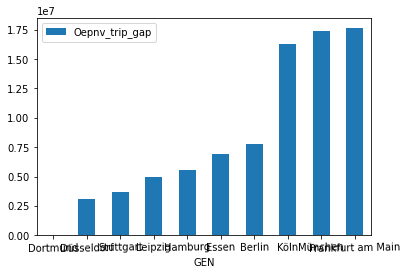

In [83]:
ax = result.sort_values(by=['Oepnv_trip_gap']).plot.bar(x='GEN', y='Oepnv_trip_gap', rot=1)
ax

### Stuttgart Relationen

In [67]:
cond = np.bitwise_and(df_P_2020_sel['Area']=="08111", df_P_2020_sel['Typ']=="tangential")
df = df_P_2020_sel[cond].copy()

In [68]:
df['Total'] = df['Oepnv'] + df['Miv'] + df['Rad'] + df['Fuß']
df['Oepnv_mode_share'] = df['Oepnv']/df['Total']
df['Non_Oepnv_trips'] = df['Total']-df['Oepnv']

In [69]:
df

,quelle_ags,ziel_ags,quelle_gen,ziel_gen,Oepnv,Miv,Rad,Fuß,Area,Typ,Total,Oepnv_mode_share,Non_Oepnv_trips
115,08115,08116,Böblingen,Esslingen,3112443.0,22852318.0,505330.0,0.0,08111,tangential,26470091.0,0.117583,23357648.0
116,08115,08118,Böblingen,Ludwigsburg,3974720.0,31850899.0,975251.0,0.0,08111,tangential,36800870.0,0.108006,32826150.0
117,08115,08119,Böblingen,Rems-Murr-Kreis,517682.0,5196179.0,0.0,0.0,08111,tangential,5713861.0,0.090601,5196179.0
118,08116,08118,Esslingen,Ludwigsburg,1654872.0,10460875.0,0.0,0.0,08111,tangential,12115747.0,0.136589,10460875.0
119,08116,08119,Esslingen,Rems-Murr-Kreis,7681985.0,21486840.0,746086.0,0.0,08111,tangential,29914911.0,0.256795,22232926.0
120,08118,08119,Ludwigsburg,Rems-Murr-Kreis,5187448.0,21280274.0,859426.0,0.0,08111,tangential,27327148.0,0.189828,22139700.0


In [70]:
df = df.merge(links[['quelle_ags','ziel_ags', 'distance']], how='left', on=['quelle_ags', 'ziel_ags'])
df['Oepnv_pkm'] = df['Oepnv'] * df['distance']
df['Miv_pkm'] = df['Miv'] * df['distance']
df['Rad_pkm'] = df['Rad'] * df['distance']
df['Fuß_pkm'] = df['Fuß'] * df['distance']
df['Total_pkm'] = df['Total'] * df['distance']
df['Oepnv_mode_share_pkm'] = df['Oepnv_pkm']/df['Total_pkm']
df['Non_Oepnv_trip_pkm'] = df['Total_pkm']-df['Oepnv_pkm']
df

,quelle_ags,ziel_ags,quelle_gen,ziel_gen,Oepnv,Miv,Rad,Fuß,Area,Typ,...,Oepnv_mode_share,Non_Oepnv_trips,distance,Oepnv_pkm,Miv_pkm,Rad_pkm,Fuß_pkm,Total_pkm,Oepnv_mode_share_pkm,Non_Oepnv_trip_pkm
0,08115,08116,Böblingen,Esslingen,3112443.0,22852318.0,505330.0,0.0,08111,tangential,...,0.117583,23357648.0,32339.622798,1.006552e+11,7.390353e+11,1.634218e+10,0.0,8.560328e+11,0.117583,7.553775e+11
1,08115,08118,Böblingen,Ludwigsburg,3974720.0,31850899.0,975251.0,0.0,08111,tangential,...,0.108006,32826150.0,20481.521862,8.140831e+10,6.523549e+11,1.997462e+10,0.0,7.537378e+11,0.108006,6.723295e+11
2,08115,08119,Böblingen,Rems-Murr-Kreis,517682.0,5196179.0,0.0,0.0,08111,tangential,...,0.090601,5196179.0,37346.734986,1.933373e+10,1.940603e+11,0.000000e+00,0.0,2.133941e+11,0.090601,1.940603e+11
3,08116,08118,Esslingen,Ludwigsburg,1654872.0,10460875.0,0.0,0.0,08111,tangential,...,0.136589,10460875.0,29803.937201,4.932170e+10,3.117753e+11,0.000000e+00,0.0,3.610970e+11,0.136589,3.117753e+11
4,08116,08119,Esslingen,Rems-Murr-Kreis,7681985.0,21486840.0,746086.0,0.0,08111,tangential,...,0.256795,22232926.0,21809.705396,1.675418e+11,4.686217e+11,1.627192e+10,0.0,6.524354e+11,0.256795,4.848936e+11
5,08118,08119,Ludwigsburg,Rems-Murr-Kreis,5187448.0,21280274.0,859426.0,0.0,08111,tangential,...,0.189828,22139700.0,21708.206184,1.126102e+11,4.619566e+11,1.865660e+10,0.0,5.932234e+11,0.189828,4.806132e+11


In [71]:
df['Oepnv_ms_gap'] = df['Oepnv_mode_share'].max()-df['Oepnv_mode_share']
df['Oepnv_trip_gap'] = df['Oepnv_ms_gap']*df['Total']

df['Oepnv_pkm_ms_gap'] = df['Oepnv_mode_share_pkm'].max()-df['Oepnv_mode_share_pkm']
df['Oepnv_tripPkm_gap'] = df['Oepnv_pkm_ms_gap']*df['Total_pkm']

In [72]:
df.sort_values(by='Oepnv_tripPkm_gap', ascending=False)

,quelle_ags,ziel_ags,quelle_gen,ziel_gen,Oepnv,Miv,Rad,Fuß,Area,Typ,...,Miv_pkm,Rad_pkm,Fuß_pkm,Total_pkm,Oepnv_mode_share_pkm,Non_Oepnv_trip_pkm,Oepnv_ms_gap,Oepnv_trip_gap,Oepnv_pkm_ms_gap,Oepnv_tripPkm_gap
0,08115,08116,Böblingen,Esslingen,3112443.0,22852318.0,505330.0,0.0,08111,tangential,...,7.390353e+11,1.634218e+10,0.0,8.560328e+11,0.117583,7.553775e+11,0.139211,3.684931e+06,0.139211,1.191693e+11
1,08115,08118,Böblingen,Ludwigsburg,3974720.0,31850899.0,975251.0,0.0,08111,tangential,...,6.523549e+11,1.997462e+10,0.0,7.537378e+11,0.108006,6.723295e+11,0.148788,5.475541e+06,0.148788,1.121474e+11
3,08116,08118,Esslingen,Ludwigsburg,1654872.0,10460875.0,0.0,0.0,08111,tangential,...,3.117753e+11,0.000000e+00,0.0,3.610970e+11,0.136589,3.117753e+11,0.120206,1.456385e+06,0.120206,4.340602e+10
5,08118,08119,Ludwigsburg,Rems-Murr-Kreis,5187448.0,21280274.0,859426.0,0.0,08111,tangential,...,4.619566e+11,1.865660e+10,0.0,5.932234e+11,0.189828,4.806132e+11,0.066967,1.830014e+06,0.066967,3.972631e+10
2,08115,08119,Böblingen,Rems-Murr-Kreis,517682.0,5196179.0,0.0,0.0,08111,tangential,...,1.940603e+11,0.000000e+00,0.0,2.133941e+11,0.090601,1.940603e+11,0.166193,9.496062e+05,0.166193,3.546469e+10
4,08116,08119,Esslingen,Rems-Murr-Kreis,7681985.0,21486840.0,746086.0,0.0,08111,tangential,...,4.686217e+11,1.627192e+10,0.0,6.524354e+11,0.256795,4.848936e+11,0.000000,0.000000e+00,0.000000,0.000000e+00


In [65]:
df['Oepnv_mode_share_trip_gap_pkm'] = df['distance']*df['Oepnv_mode_share_trip_gap']
df['Oepnv_mode_share']
df.sort_values(by='Oepnv_mode_share_trip_gap_pkm', ascending = False)

,quelle_ags,ziel_ags,quelle_gen,ziel_gen,Oepnv,Miv,Rad,Fuß,Area,Typ,...,Oepnv_pkm,Miv_pkm,Rad_pkm,Fuß_pkm,Total_pkm,Oepnv_mode_share_pkm,Non_Oepnv_trip_pkm,Oepnv_mode_share__gap,Oepnv_mode_share_trip_gap,Oepnv_mode_share_trip_gap_pkm
0,08115,08116,Böblingen,Esslingen,3112443.0,22852318.0,505330.0,0.0,08111,tangential,...,1.006552e+11,7.390353e+11,1.634218e+10,0.0,8.560328e+11,0.117583,7.553775e+11,0.139211,3.684931e+06,1.191693e+11
1,08115,08118,Böblingen,Ludwigsburg,3974720.0,31850899.0,975251.0,0.0,08111,tangential,...,8.140831e+10,6.523549e+11,1.997462e+10,0.0,7.537378e+11,0.108006,6.723295e+11,0.148788,5.475541e+06,1.121474e+11
3,08116,08118,Esslingen,Ludwigsburg,1654872.0,10460875.0,0.0,0.0,08111,tangential,...,4.932170e+10,3.117753e+11,0.000000e+00,0.0,3.610970e+11,0.136589,3.117753e+11,0.120206,1.456385e+06,4.340602e+10
5,08118,08119,Ludwigsburg,Rems-Murr-Kreis,5187448.0,21280274.0,859426.0,0.0,08111,tangential,...,1.126102e+11,4.619566e+11,1.865660e+10,0.0,5.932234e+11,0.189828,4.806132e+11,0.066967,1.830014e+06,3.972631e+10
2,08115,08119,Böblingen,Rems-Murr-Kreis,517682.0,5196179.0,0.0,0.0,08111,tangential,...,1.933373e+10,1.940603e+11,0.000000e+00,0.0,2.133941e+11,0.090601,1.940603e+11,0.166193,9.496062e+05,3.546469e+10
4,08116,08119,Esslingen,Rems-Murr-Kreis,7681985.0,21486840.0,746086.0,0.0,08111,tangential,...,1.675418e+11,4.686217e+11,1.627192e+10,0.0,6.524354e+11,0.256795,4.848936e+11,0.000000,0.000000e+00,0.000000e+00


### Boeblingen Esslingen Mode Share

In [66]:
cond = np.bitwise_and(df['quelle_ags']=='08115', df['ziel_ags']=='08116')
df_boeb_essl_ms = df[cond][['quelle_ags', 'ziel_ags', 'Oepnv', 'Miv', 'Rad', 'Fuß', 'Total']]
df_boeb_essl_ms['Oepnv_ms']=df_boeb_essl_ms['Oepnv']/df_boeb_essl_ms['Total']
df_boeb_essl_ms['Miv_ms']=df_boeb_essl_ms['Miv']/df_boeb_essl_ms['Total']
df_boeb_essl_ms['Rad_ms']=df_boeb_essl_ms['Rad']/df_boeb_essl_ms['Total']
df_boeb_essl_ms['Fuß_ms']=df_boeb_essl_ms['Fuß']/df_boeb_essl_ms['Total']
df_boeb_essl_ms

,quelle_ags,ziel_ags,Oepnv,Miv,Rad,Fuß,Total,Oepnv_ms,Miv_ms,Rad_ms,Fuß_ms
0,08115,08116,3112443.0,22852318.0,505330.0,0.0,26470091.0,0.117583,0.863326,0.019091,0.0
